In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Extract the features (pixel values) and labels from the dataset
X = mnist.data.values.astype('float32')
y = mnist.target.values.astype('int64')

<h3>Subset the data to use only class 0 and class1</h3>

In [ ]:
filter = np.where((y == 0) | (y == 1))
X = X[filter]
y = y[filter]

In [ ]:
X[0:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<h3>Standardize the data</h3>

In [ ]:
# Define a small epsilon value to add to the standard deviation to avoid division by zero
eps = 1e-8

# Calculate the standard deviation of each feature and replace any zero values with eps
std_dev = np.std(X, axis=0)
std_dev[std_dev == 0] = eps

# Normalize the data by subtracting the mean and dividing by the standard deviation
X = (X - np.mean(X, axis=0)) / std_dev

<h3>Accuracy function:</h3>

In [ ]:
def accuracy(y_pred, y):
    return np.sum((y_pred == y))/len(y)

<h3>Implemented the Logistic Regression Classifier</h3>

In [ ]:
from LogisticRegression import LogisticRegression

<h3>Using Cross Validation to split the data:</h3>

In [ ]:
def split_array(arr, k):
    n = len(arr)
    flod_size = n // k
    remainder = n % k
    result = []
    start = 0
    for i in range(k):
        end = start + flod_size
        if i < remainder:
            end += 1
        result.append(np.array(arr[start:end]))
        start = end
    return np.array(result)

In [ ]:
from sklearn.utils import shuffle

all_accuracies = []

def cross_validation(X, y, k, learning_rate = 0.01):
    # Shuffle data
    X, y = shuffle(X, y)
    
    # Split data into k folds
    X = split_array(X, k)
    y = split_array(y, k)
    
    # Train and test model on each fold
    for i in range(k):
        # Get test fold
        X_val = X[i]
        y_val = y[i]
        
        # Get training folds
        X_train = np.concatenate([X[j] for j in range(k) if j != i])
        y_train = np.concatenate([y[j] for j in range(k) if j != i])

        model = LogisticRegression(learning_rate=learning_rate)
        
        # Train model on training folds
        model.fit(X_train, y_train)
        
        # Test model on test fold
        y_pred = model.predict(X_val)
        acc = accuracy(y_pred, y_val)
        
        all_accuracies.append(acc)
        print(f"Fold {i+1}: {acc}")

    print("Average Accuracy: ", np.mean(all_accuracies))
    return np.mean(all_accuracies)

In [ ]:
#10-flod cross validation
cross_validation(X, y, 10)

Fold 1: 0.9979702300405954
Fold 2: 0.9986468200270636
Fold 3: 0.9986468200270636
Fold 4: 0.9979702300405954
Fold 5: 1.0
Fold 6: 0.9972936400541272
Fold 7: 0.9986468200270636
Fold 8: 0.9972936400541272
Fold 9: 1.0
Fold 10: 0.9986468200270636
Average Accuracy:  0.99851150202977


0.99851150202977

<h3>Report difference accuracy for the different learning rate</h3>

In [ ]:
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001, 0.0000000001, 0.00000000001]
dic_results = {}

for i in range(0, len(learning_rates)):
    acc = cross_validation(X, y, 10, learning_rates[i])
    dic_results[learning_rates[i]] = acc

Fold 1: 0.9986468200270636
Fold 2: 0.9959404600811907
Fold 3: 1.0
Fold 4: 1.0
Fold 5: 1.0
Fold 6: 0.9993234100135318
Fold 7: 0.9993234100135318
Fold 8: 0.9972936400541272
Fold 9: 0.9986468200270636
Fold 10: 1.0
Average Accuracy:  0.9987144790257103
Fold 1: 0.9986468200270636
Fold 2: 0.9986468200270636
Fold 3: 0.9972936400541272
Fold 4: 0.9979702300405954
Fold 5: 1.0
Fold 6: 0.9972936400541272
Fold 7: 0.9972936400541272
Fold 8: 1.0
Fold 9: 0.9979702300405954
Fold 10: 1.0
Average Accuracy:  0.9986468200270637
Fold 1: 0.9986468200270636
Fold 2: 0.9972936400541272
Fold 3: 0.996617050067659
Fold 4: 0.9993234100135318
Fold 5: 0.9952638700947226
Fold 6: 0.996617050067659
Fold 7: 0.9959404600811907
Fold 8: 0.9952638700947226
Fold 9: 0.9945872801082544
Fold 10: 0.9972936400541272
Average Accuracy:  0.9981562922868742
Fold 1: 0.996617050067659
Fold 2: 0.9979702300405954
Fold 3: 0.9939106901217862
Fold 4: 0.993234100135318
Fold 5: 0.9945872801082544
Fold 6: 0.993234100135318
Fold 7: 0.99323410013

In [ ]:
dic_results

{0.1: 0.9987144790257103,
 0.01: 0.9986468200270637,
 0.001: 0.9981562922868742,
 0.0001: 0.997469553450609,
 1e-05: 0.9967974740640506,
 1e-06: 0.9963174173593661,
 1e-07: 0.9959573748308526,
 1e-08: 0.9956698240866035,
 1e-09: 0.9954330175913397,
 1e-10: 0.9952454176405462,
 1e-11: 0.9950834460983311}

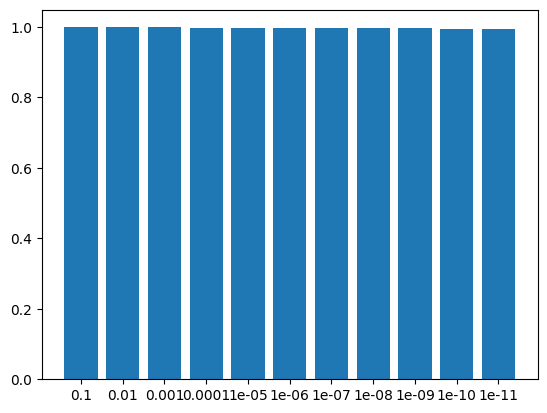

In [ ]:
plt.bar(range(len(dic_results)), list(dic_results.values()), tick_label=list(dic_results.keys()))
plt.show()

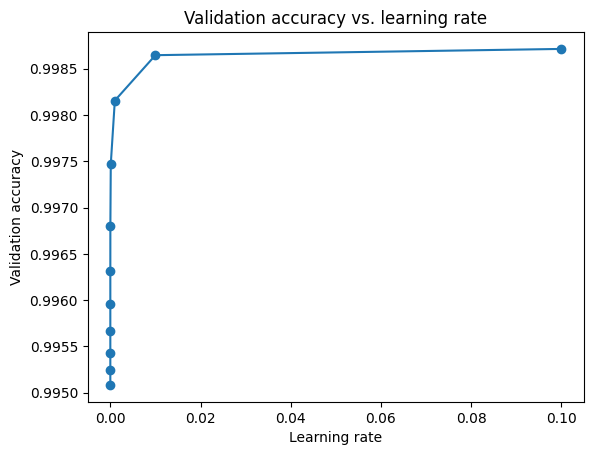

In [ ]:
# Plot the validation accuracies vs. the learning rates
plt.plot(list(dic_results.keys()), list(dic_results.values()), 'o-')
plt.xlabel('Learning rate')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy vs. learning rate')
plt.show()